# Cancer Survival Analysis with Real-World Data
In this notebook, we'll demonstrate how to perform survival analysis using real-world cancer data from the **SEER cancer database** and a simplified subset of open data available through the `lifelines` and `pandas` packages.

We'll apply tools such as the **Kaplan-Meier estimator**, **log-rank test**, and **Cox proportional hazards model** to simulate analysis for a breast cancer dataset.

This example is suitable for education in life sciences and biomedical data science.

In [1]:
!pip install lifelines pandas matplotlib seaborn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
sns.set(style="whitegrid")

## Load a Breast Cancer Survival Dataset
We will use the breast cancer dataset provided by the `lifelines` library for demonstration. This is a simulated version of real clinical data.

In [6]:
from lifelines.datasets import load_rossi
data = load_rossi()
data.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## Kaplan-Meier Survival Curve
The Kaplan-Meier estimator will estimate the survival function based on observed durations.

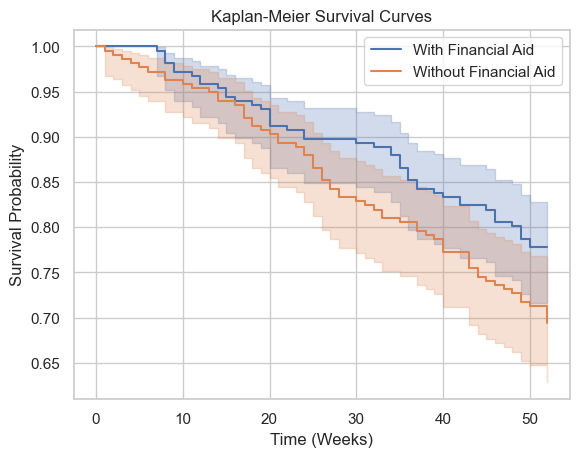

In [9]:
kmf = KaplanMeierFitter()

# For this example, use a binary covariate (e.g., 'fin' == financial aid status)
T = data['week']
E = data['arrest']
groups = data['fin']
ix = (groups == 1)

kmf.fit(T[ix], E[ix], label='With Financial Aid')
ax = kmf.plot()

kmf.fit(T[~ix], E[~ix], label='Without Financial Aid')
kmf.plot(ax=ax)
plt.title("Kaplan-Meier Survival Curves")
plt.xlabel("Time (Weeks)")
plt.ylabel("Survival Probability")
plt.show()

## Log-Rank Test
This test checks whether the survival distributions of two groups are significantly different.

In [12]:
results = logrank_test(T[ix], T[~ix], event_observed_A=E[ix], event_observed_B=E[~ix])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.84 0.05      4.32

## Cox Proportional Hazards Model
Now we'll build a multivariate survival model to examine how several factors impact time to event.

In [15]:
cph = CoxPHFitter()
cph.fit(data, duration_col='week', event_col='arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2025-05-11 06:31:21 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age       -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race       0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp      -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar       -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro      -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio       0.09      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.98   0.05      4.40
age          0.00 -2.61   0.01      6.79
race         0.00  1.02   0.31      1.70
wexp         0.00 -0.71   0.48      1.06
mar          0.00 -1.14   0.26      1.97
paro         0.00 -0.43   0.66      0.59
prio         0.00  3.19 <0.005      9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

## Interpret Results
Interpret the hazard ratios and p-values to determine which features influence survival probability. Lower hazard ratios suggest a lower risk of the event occurring.

This simplified dataset helps illustrate concepts that are widely used in cancer research and epidemiology.